In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels import regression
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import seaborn
import math
%matplotlib inline
from sklearn.decomposition import PCA #For PCA Analysis
#listdf=pd.DataFrame(equity,columns=['List'])
#listdf.to_csv('list.csv')
import time 
from datetime import datetime, timedelta


In [25]:
GJI=pd.read_excel('C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\Global Jet Index Data.xlsx','Sheet3')

In [26]:
df=GJI.copy()
df = df.drop([0]) #Drop first row which is a space 
df.index = range(len(df)) #Select the range row for reindex

N = 3 #Total Constituents in the Index Stock ASX200 

equity_list = []
for i in range(N):
    equity_list.append(df.iloc[0, i * 3]) #Row 3 of the Book2 file. Append the TICKER name to the list
print(equity_list) #Check if the output is correct and print its length too
print(len(equity_list))

df = df.drop([0, 1]) #drop the name and date row
df.index = range(len(df)) #reindex 
df = df.drop([len(df) - 1])#drop last value
print(df)

date_list = df.iloc[:,0].tolist()#add the benchmark for datelist. 2521 should be gone just [:,0]. But some nan value will create an error so i just set in manually at 2521 the end of the date of asset 1
columns = ['Date'] + equity_list
clean_df = pd.DataFrame(np.arange(len(df) * (N+1)).reshape(len(df), N + 1), index=range(len(df)), columns=columns)
clean_df['Date'] = date_list
clean_df.index = date_list
# clean_df = df.iloc[:, [0, 1]]
# clean_df.columns = ['Date', equity_list[0]]
for i in range(3):
    print(equity_list[i])
    right = df.iloc[:, [i * 3, i * 3 + 1]] #each asset date and closing price
    right.columns = ['Date', equity_list[i]] #change the column so its more readable
    right.index = right['Date'].tolist() #update the index
    value = math.nan
    for date in date_list: #check  first date_list we created if it is in each asset index
        # print(date)
        if date not in right.index: #if its not, update the value to nan
            clean_df.loc[date, equity_list[i]] = value #for the second till end loop, just update with the value before
        else:
            value = right.loc[date, equity_list[i]] #if valid, update the value with the value of the right
            clean_df.loc[date, equity_list[i]] = right.loc[date, equity_list[i]] #

['JETSX Index', 'JETS US Equity', 'JETS UP Equity']
3
                     BarTp    Trade  Unnamed: 2              BarTp.1  Trade.1  \
0      2020-04-01 15:00:00  2180.66         NaN  2020-04-01 21:30:00    13.63   
1      2020-04-01 15:05:00  2180.68         NaN  2020-04-01 21:35:00    13.77   
2      2020-04-01 15:10:00  2181.63         NaN  2020-04-01 21:40:00   13.895   
3      2020-04-01 15:15:00  2181.38         NaN  2020-04-01 21:45:00    13.71   
4      2020-04-01 15:20:00   2180.8         NaN  2020-04-01 21:50:00  13.6869   
...                    ...      ...         ...                  ...      ...   
22760  2020-10-14 22:25:00  2659.76         NaN                  NaN      NaN   
22761  2020-10-14 22:30:00   2657.2         NaN                  NaN      NaN   
22762  2020-10-14 22:35:00  2657.49         NaN                  NaN      NaN   
22763  2020-10-14 22:40:00  2656.12         NaN                  NaN      NaN   
22764  2020-10-14 22:45:00  2654.99         NaN        

In [30]:
clean_df.to_csv("C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\Global Jet Index Data Formatted.csv")

In [266]:
#EMEA: 15:00PM to 21:30 PM US: 21:30PM to 04:00 AM  ) HK TIME
clean_df

,Date,JETSX Index,JETS US Equity,JETS UP Equity
2020-04-01 15:00:00,2020-04-01 15:00:00,2180.66,NaN,NaN
2020-04-01 15:05:00,2020-04-01 15:05:00,2180.68,NaN,NaN
2020-04-01 15:10:00,2020-04-01 15:10:00,2181.63,NaN,NaN
2020-04-01 15:15:00,2020-04-01 15:15:00,2181.38,NaN,NaN
2020-04-01 15:20:00,2020-04-01 15:20:00,2180.80,NaN,NaN
...,...,...,...,...
2020-10-14 22:25:00,2020-10-14 22:25:00,2659.76,17.64,17.64
2020-10-14 22:30:00,2020-10-14 22:30:00,2657.20,17.63,17.63
2020-10-14 22:35:00,2020-10-14 22:35:00,2657.49,17.63,17.62
2020-10-14 22:40:00,2020-10-14 22:40:00,2656.12,17.63,17.62


In [380]:
EMEAdata

,JETSX Index
2020-04-01 15:00:00,2180.66
2020-04-01 15:05:00,2180.68
2020-04-01 15:10:00,2181.63
2020-04-01 15:15:00,2181.38
2020-04-01 15:20:00,2180.80
...,...
2020-10-14 21:10:00,2639.48
2020-10-14 21:15:00,2639.61
2020-10-14 21:20:00,2639.25
2020-10-14 21:25:00,2639.12


## Preprocessing  EMEA and US hour for jets index

In [384]:
data1=pd.read_excel("C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\DailyOilfutures&Jetsx2.xlsx",'INTRA')

In [24]:
def is_time_between(begin_time,end_time,check_time):
     if begin_time < end_time:
        return check_time >= begin_time and check_time <= end_time
     else: # crosses midnight
        return check_time >= begin_time or check_time <= end_time

In [406]:
df=data1.drop([0])
df.index = range(len(df)) #Select the range row for reindex
N=3
equity_list = []
for i in range(N):
    equity_list.append(df.iloc[0, i * 7])
equity_list
df = df.drop([0, 1]) #drop the name and date row
df.index = range(len(df)) #reindex 
df = df.drop([len(df) - 1])
df.columns=['Dates','Open','Close','High','Low','Volume',' ','Dates','Open','Close','High','Low','Volume',' ','Dates','Open','Close','High','Low','Volume']
CL1=df.iloc[:,:6].dropna()
C01=df.iloc[:,7:13].dropna()
JETSX=df.iloc[:,14:].dropna()


,Dates,Open,Close,High,Low,Volume
0,2020-04-13 06:00:00,24.6,22.64,24.74,22.2,12819
1,2020-04-13 06:05:00,22.68,22.61,22.95,22.37,5822
2,2020-04-13 06:10:00,22.62,22.32,22.67,22.03,5928
3,2020-04-13 06:15:00,22.31,22.28,22.51,22.05,3303
4,2020-04-13 06:20:00,22.26,22.47,22.53,22.23,2277
...,...,...,...,...,...,...
38280,2020-10-23 11:05:00,40.77,40.76,40.8,40.76,374
38281,2020-10-23 11:10:00,40.76,40.75,40.77,40.74,111
38282,2020-10-23 11:15:00,40.75,40.74,40.76,40.72,164
38283,2020-10-23 11:20:00,40.73,40.73,40.74,40.72,170


In [422]:
data=JETSX.copy()
data['DateF'] = pd.to_datetime(data['Dates'], format='%Y:%M:%D').dt.date
data['HourF'] = pd.to_datetime(data['Dates'], format='%Y:%M:%D').dt.time
data=data[['Dates','Open','Close','High','Low','Volume','DateF','HourF']]

In [441]:
EMEAdf=pd.DataFrame(columns=['Dates','Open','Close','High','Low','Volume','DateF','HourF'])
USdf=pd.DataFrame(columns=['Dates','Open','Close','High','Low','Volume','DateF','HourF'])
start1=datetime.datetime.strptime('15:00:00', '%H:%M:%S').time()
end1=datetime.datetime.strptime('21:30:00', '%H:%M:%S').time()
start2=datetime.datetime.strptime('21:30:00', '%H:%M:%S').time()
end2=datetime.datetime.strptime('04:00:00', '%H:%M:%S').time()
for i in data.index:
    if is_time_between(start1,end1,data.loc[i]['HourF']) and is_time_between(start2,end2,data.loc[i]['HourF']):
        EMEAdf=EMEAdf.append(data.loc[i])
        USdf=USdf.append(data.loc[i])
    elif is_time_between(start1,end1,data.loc[i]['HourF']):
        EMEAdf=EMEAdf.append(data.loc[i])
    elif is_time_between(start2,end2,data.loc[i]['HourF']):
        USdf=USdf.append(data.loc[i])
        

In [494]:
def fm_summary(p):#Summary Statistics Function
    s = p.describe().T
    s['std_error'] = s['std']/np.sqrt(s['count'])
    s['tstat'] = s['mean']/s['std_error']
    return s[['mean','std','tstat']].T

In [496]:
USdf[['Close']].pct_change().describe()
fm_summary(USdf[['Close']].pct_change())

,Close
mean,0.000027
std,0.004174
tstat,0.684531


In [498]:
EMEAdf[['Close']].pct_change().describe()
fm_summary(EMEAdf[['Close']].pct_change())

,Close
mean,0.000024
std,0.004074
tstat,0.611847


### Jetsx Index Consittuents

In [499]:
equitylist=pd.read_excel('C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\JETSX as of Oct 22 20201.xlsx')
equitylist #22 oCT

,Ticker,Name,Weight,Shares,Price,Country,Unnamed: 6
0,LUV UN Equity,Southwest Airlines Co,10.188181,6.777444,40.730,UN,NaN
1,DAL UN Equity,Delta Air Lines Inc,10.021683,8.435356,32.190,UN,NaN
2,UAL UW Equity,United Airlines Holdings Inc,9.709443,7.362834,35.730,UW,NaN
3,AAL UW Equity,American Airlines Group Inc,9.290763,20.138406,12.500,UW,NaN
4,CJT CT Equity,Cargojet Inc,4.294587,0.668310,229.000,CT,TORONTO
5,ALGT UW Equity,Allegiant Travel Co,4.122739,0.816074,136.880,UW,NaN
6,JBLU UW Equity,JetBlue Airways Corp,3.993625,8.825931,12.260,UW,NaN
7,ALK UN Equity,Alaska Air Group Inc,3.863284,2.639293,39.660,UN,NaN
8,ATSG UW Equity,Air Transport Services Group Inc,3.624750,3.354213,29.280,UW,NaN
9,AC CT Equity,Air Canada,3.600724,7.955133,16.130,CT,NaN


In [500]:
namelist=equitylist['Ticker'].tolist()

In [515]:
for name in USairline:
    name=pd.read_excel('C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\JETSX as of Oct 22 20201.xlsx',name)

KeyboardInterrupt: 

In [505]:
USairline=['LUV UN Equity','DAL UN Equity','UAL UW Equity','CJT CT Equity','ALGT UW Equity','JBLU UW Equity','ALK UN Equity','ATSG UW Equity','SKYW UW Equity','HA UW Equity','GD UN Equity','TXT UN Equity','PAC UN Equity','OMAB MF Equity','RYAAY UW Equity','CPA UN Equity','AZUL UN Equity','GOL UN Equity','CJT CT Equity','AC CT Equity']

### Compare and Edit missing data for EMEA and US hour

In [137]:
def compare(a,b):
    date1=a.tolist()
    date2=b.tolist()
    for y in date2:
        if(y not in date1):
            print(y)

In [574]:
#USdf['Dates']=USdf['Dates']-timedelta(hours=6, minutes=30) ##1 time only if not repeat 

In [589]:
compare(USdf['Dates'],EMEAdf['Dates'])

2020-04-29 15:00:00
2020-06-04 15:00:00
2020-06-04 15:05:00
2020-06-04 15:10:00
2020-06-05 15:00:00
2020-06-05 15:05:00
2020-06-05 15:10:00
2020-06-05 15:15:00
2020-06-11 15:00:00
2020-08-11 15:00:00
2020-08-27 17:10:00
2020-08-27 17:15:00
2020-08-27 17:20:00
2020-08-27 17:25:00
2020-08-27 17:30:00
2020-08-27 17:40:00
2020-08-27 18:45:00


In [657]:
USdf2=USdf[['Dates','Open','Close','High','Low']].copy()
#Fill in missing data
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-04-29 15:00:00'),2280.12,2276,2302.52,2275.96]
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-06-04 15:00:00'),2612.16,2613.6,2621.9,2611.1]
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-06-04 15:05:00'),2619.11,2620.846,2630.23,2618]
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-06-04 15:10:00'),2626.06,2628.093,2638.57,2624.893]
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-06-05 15:00:00'),3092.478,3072.108,3093.15,3061.46]
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-06-05 15:05:00'),3127.581,3103.731,3128.275,3091.405]
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-06-05 15:10:00'),3162.684,3135.354,3163.4,3121.35]
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-06-05 15:15:00'),3197.787,3166.977,3198.525,3151.295]
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-06-11 15:00:00'),2620.483,2634.999,2651.534,2611.626]
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-08-11 15:00:00'),2725.119,2709.82,2731.512,2709.8]
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-08-27 17:10:00'),2686.352033,2691.043836,2691.210458,2686.254358]
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-08-27 17:15:00'),2688.173388,2691.51306,2691.790764,2688.010596]
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-08-27 17:20:00'),2690.12484,2692.0158,2692.41252,2689.89228]
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-08-27 17:25:00'),2691.75105,2692.43475,2692.93065,2691.46035]
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-08-27 17:30:00'),2692.6545,2692.6675,2693.2185,2692.3315]
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-08-27 17:40:00'),2692.115,2691.54,2692.235,2691.31]
USdf2.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-08-27 18:45:00'),2672.255,2674.05,2674.87,2671.7]


In [661]:
USdf2=USdf2.sort_values(by=['Dates'])
USdf2=USdf2.reset_index(drop=True)

In [618]:
compare(EMEAdf['Dates'],USdf['Dates'])

2020-04-29 21:30:00
2020-06-04 21:30:00
2020-06-05 21:30:00
2020-06-11 21:30:00
2020-08-11 21:30:00


In [699]:
EMEAdf2=EMEAdf[['Dates','Open','Close','High','Low']].copy()
#Fill in missing data


In [700]:
EMEAdf2.loc[22588]=[pd.to_datetime('2020-04-29 21:30:00'),2280.12,2276,2302.52,2275.96]
EMEAdf2.loc[22589]=[pd.to_datetime('2020-06-04 21:30:00'),2612.16,2613.6,2621.9,2611.1]
EMEAdf2.loc[22590]=[pd.to_datetime('2020-06-05 21:30:00'),3092.478,3072.108,3093.15,3061.46]
EMEAdf2.loc[22591]=[pd.to_datetime('2020-06-11 21:30:00'),2620.483,2634.999,2651.534,2611.626]
EMEAdf2.loc[22592]=[pd.to_datetime('2020-08-11 21:30:00'),2725.119,2709.82,2731.512,2709.8]

In [701]:
EMEAdf2=EMEAdf2.sort_values(by=['Dates'])
EMEAdf2=EMEAdf2.reset_index(drop=True)

In [702]:
len(EMEAdf2)==len(USdf2) 

True

In [703]:
USdaily=USdf2.set_index('Dates').resample('D').mean()
USdaily=USdaily.dropna()

In [704]:
EMEAdaily=EMEAdf2.set_index('Dates').resample('D').mean()
EMEAdaily=EMEAdaily.dropna()

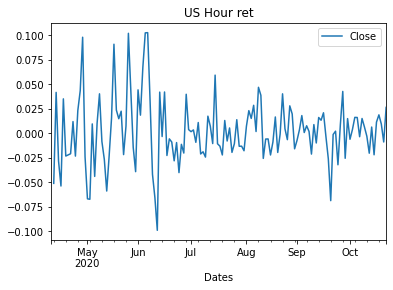

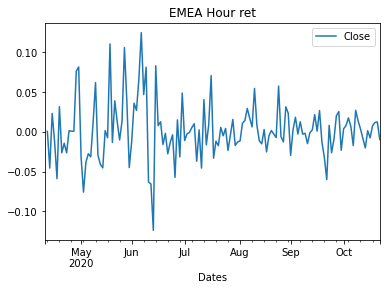

In [711]:
USdaily[['Close']].pct_change().plot(title='US Hour ret')
EMEAdaily[['Close']].pct_change().plot(title='EMEA Hour ret')

In [718]:
dfcorr=pd.DataFrame()
dfcorr=USdaily[['Close']].pct_change().dropna()
dfcorr['EMEA']=EMEAdaily[['Close']].pct_change().dropna()
dfcorr.columns=['US','EMEA']

In [720]:
dfcorr.corr()

,US,EMEA
US,1.000000,0.348749
EMEA,0.348749,1.000000


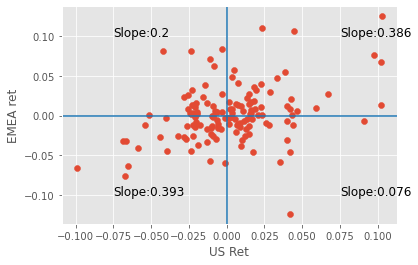

In [746]:
with plt.style.context("ggplot"):
    plt.scatter(dfcorr.US,dfcorr.EMEA)
    plt.xlabel('US Ret')
    plt.ylabel('EMEA ret')
    plt.axhline()
    plt.axvline()
    plt.text(0.075, 0.1,"Slope:"+str(model1.fit().params[1].round(3)), fontsize=12)
    plt.text(-0.075, 0.1,"Slope:"+str(model4.fit().params[1].round(3)), fontsize=12)
    plt.text(0.075, -0.1,"Slope:"+str(model2.fit().params[1].round(3)), fontsize=12)
    plt.text(-0.075, -0.1,"Slope:"+str(model3.fit().params[1].round(3)), fontsize=12)

In [726]:
dftest=dfcorr.copy()
dftest['US+']=dftest['US'].apply(lambda x:x if x>0 else 0)
dftest['US-']=dftest['US'].apply(lambda x:x if x<0 else 0)
dftest['EMEA+']=dftest['EMEA'].apply(lambda x:x if x>0 else 0)
dftest['EMEA-']=dftest['EMEA'].apply(lambda x:x if x<0 else 0)

In [747]:
model1=sm.OLS(dftest['EMEA+'],sm.add_constant(dftest['US+']))
model1.fit().params[1]
model2=sm.OLS(dftest['EMEA-'],sm.add_constant(dftest['US+']))
model2.fit().params[1]
model3=sm.OLS(dftest['EMEA-'],sm.add_constant(dftest['US-']))
model3.fit().params[1]
model4=sm.OLS(dftest['EMEA+'],sm.add_constant(dftest['US-']))
model4.fit().params[1]

0.1998830668284747

In [764]:
m=sm.OLS(USdaily['Close'],sm.add_constant(EMEAdaily['Close']))
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1791.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           6.45e-81
Time:                        14:28:44   Log-Likelihood:                -801.79
No. Observations:                 140   AIC:                             1608.
Df Residuals:                     138   BIC:                             1613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.3680     56.351      1.639      0.103     -19.055     203.791
Close          0.9637      0.023     42.321      0.000       0.919       1.009
==============================================================================
Omnibus:                       10.464   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               23.877
Skew:                           0.142   Prob(JB):                     6.53e-06
Kurtosis:                       5.003   Cond. No.                     2.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Machine Learning [LSTM]

In [622]:
#Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [623]:
#Evaluation Helper to process input and output
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [624]:
import tensorflow as tf
#from tensorflow import keras for neural net implementation
from tensorflow.python.keras.layers import Input,Dense,Dropout,LSTM
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import metrics
from tensorflow.python.keras.callbacks import EarlyStopping

In [839]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))


In [807]:
X_test.head(10)

,Open,Close,High,Low
Dates,,,,
2020-08-19,2528.895063,2529.116709,2529.378228,2528.617215
2020-08-20,2533.791139,2533.661899,2534.136076,2533.400127
2020-08-21,2526.996962,2527.175823,2527.522785,2526.720759
2020-08-24,2509.326835,2509.395063,2509.658987,2509.089367
2020-08-25,2654.204430,2654.250000,2654.736709,2653.914430
2020-08-26,2638.502658,2638.474177,2638.813165,2638.244557
2020-08-27,2604.799367,2605.595570,2605.845570,2604.591646
2020-08-28,2688.155949,2688.049494,2688.421392,2687.778228
2020-08-31,2751.809494,2751.528228,2752.051646,2751.367722


In [1049]:
y_pred=EMEAdaily['Close']
y_true=USdaily['Close']
score=r2_score(y_true,y_pred)
score

0.9270234155305767

In [766]:

pd.read_excel('C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\JETSX as of Oct 22 20201.xlsx','LUV UN Equity')

,BarTp,Trade,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,LUV UN Equity,NaN,NaN,NaN,NaN,NaN
2,Dates,Open,Close,High,Low,Volume
3,2020-04-13 21:30:00,36.69,35.94,36.7,35.75,301443
4,2020-04-13 21:35:00,35.88,35.27,35.91,35.02,35626
...,...,...,...,...,...,...
10606,2020-10-23 03:35:00,42.22,42.12,42.22,42.1,13627
10607,2020-10-23 03:40:00,42.13,42.045,42.14,42.02,18455
10608,2020-10-23 03:45:00,42.04,41.97,42.075,41.95,33509
10609,2020-10-23 03:50:00,41.96,41.89,41.96,41.855,71526


### Data preparation for LSTM

In [851]:
testdf=EMEAdaily.copy()

In [854]:
testdf['open_pred']=USdaily['Open']
testdf['close_pred']=USdaily['Close']

In [855]:
testdf

,Open,Close,High,Low,open_pred,close_pred
Dates,,,,,,
2020-04-10,2274.363671,2274.385190,2274.447089,2274.300253,2275.416203,2275.422278
2020-04-13,2277.113418,2276.209367,2277.229241,2276.091772,2161.475949,2159.238101
2020-04-14,2172.398734,2172.831519,2173.159620,2172.090127,2249.462405,2249.249114
2020-04-15,2224.048481,2223.553038,2224.408228,2222.958861,2185.775949,2185.430380
2020-04-16,2197.284810,2196.919620,2197.607722,2196.644304,2069.132278,2067.920759
...,...,...,...,...,...,...
2020-10-16,2620.663291,2620.767468,2621.086709,2620.438228,2635.373544,2635.548987
2020-10-19,2640.953038,2641.006835,2641.234051,2640.725190,2684.848608,2685.052152
2020-10-20,2672.552025,2672.695949,2672.954177,2672.259241,2710.383291,2710.436709


In [1017]:
def modify(df):
    op = df['Open'].to_numpy()
    close = df['Close'].to_numpy()
    high = df['High'].to_numpy()
    low = df['Low'].to_numpy()
    y1 = df['open_pred'].to_numpy()
    y2 = df['close_pred'].to_numpy()
    x = np.vstack((op,close,high,low)).T
    y = np.vstack((y1,y2)).T
    #Use Scaler if the datasets is not in the same range
    scaler = MinMaxScaler()
    scaler.fit(x)
    x = scaler.transform(x)
    scaler1 = MinMaxScaler()
    scaler1.fit(y)
    y = scaler1.transform(y)  
    
    x=x.reshape(x.shape[0],1,x.shape[1]) #Reshape to 3d Data set because LSTM expect 3D
    data = {'x':x, 'y':y}
    scaler = {'x':scaler, 'y':scaler1}
    
    return df,data,scaler


In [1018]:
dfori,dfm,scaler=modify(testdf)

In [1019]:
dfm

{'x': array([[[0.32501987, 0.32481189, 0.32454863, 0.32530133]],
 
        [[0.32689629, 0.32605661, 0.32644634, 0.3265245 ]],
 
        [[0.25543905, 0.25551732, 0.25546045, 0.25551706]],
 
        [[0.29068481, 0.29012686, 0.29041712, 0.29024784]],
 
        [[0.27242129, 0.2719537 , 0.2721365 , 0.2722815 ]],
 
        [[0.18395969, 0.18389742, 0.18390013, 0.18395693]],
 
        [[0.22921409, 0.22873919, 0.22891096, 0.22900091]],
 
        [[0.19055495, 0.19056608, 0.19052055, 0.19059502]],
 
        [[0.17082652, 0.1706063 , 0.17055238, 0.17080589]],
 
        [[0.13415775, 0.13390844, 0.13391281, 0.13418457]],
 
        [[0.13631646, 0.13599356, 0.1360477 , 0.13622289]],
 
        [[0.13768567, 0.1374245 , 0.13746094, 0.13763706]],
 
        [[0.13881266, 0.13866766, 0.13867698, 0.13884449]],
 
        [[0.24329968, 0.24308034, 0.24322893, 0.24334322]],
 
        [[0.36387457, 0.36340019, 0.36360387, 0.36360179]],
 
        [[0.31351418, 0.31334764, 0.31317828, 0.31367059]],
 
   

### LSTModel

In [1043]:
def construct_model():
    model=Sequential()
    model.add(LSTM(150,input_shape=(1,4),activation='tanh',recurrent_activation='sigmoid'))
    model.add(Dense(2))
    model.compile(loss='mse',optimizer='adam',metrics=[metrics.mae])
    callback=EarlyStopping(monitor='loss',patience=3)
    model.summary()
    model={'model':model,'callback':callback} #Later, call to model.fit() reutrn a History Object that has a member history which is type dict
    return model

In [1044]:
model=construct_model()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 150)               93000     
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 302       
Total params: 93,302
Trainable params: 93,302
Non-trainable params: 0
_________________________________________________________________


In [1045]:
def traindata(data,model):
#Split data 75% use to train the model and 25% use to test the model. This type of learning where model leaarns both input nad output is called supervised learning
    x_train,x_test,y_train,y_test=train_test_split(data['x'],data['y'],test_size=0.25)
    history=model['model'].fit(x_train,y_train,epochs=100,callbacks=[model['callback']])
    print ('\nTraining Finished')
    func = lambda x: math.log(x)
    val = [func(x) for x in history.history['loss']]
    
    plt.figure()
    plt.plot(val)
    plt.xlabel('epochs')
    plt.ylabel('log(mse)')
    plt.title('Model Loss Function')
    plt.xlim(0,21)
    plt.show()
    
    predict = model['model'].predict(x_test)
    #predict the next day opening and closing price. Inverse the price by trasnforming it back  to the original values
    original_values = scaler['y'].inverse_transform(y_test)
    predicted_values = scaler['y'].inverse_transform(predict)
    #concatenenat the original open close and the preidcted one
    values = np.concatenate((original_values, predicted_values),axis=1)
    #set it do dataframe
    values = pd.DataFrame(values, columns = list(('open_pred', 'close_pred', 'pred_open_next_day', 'pred_close_next_day')))
    
    values = values.round(2)
    
    return values

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2838 - mean_absolute_error: 0.4939
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2445 - mean_absolute_error: 0.4565
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2079 - mean_absolute_error: 0.4191
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1735 - mean_absolute_error: 0.3809
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1414 - mean_absolute_error: 0.3415
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1111 - mean_absolute_error: 0.3002
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0838 - mean_absolute_error: 0.2575
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0588 - mean_absolute_error: 0.2139
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0384 - mean_absolute_error: 0.1714
Epoch 10/100
4/4 [==========

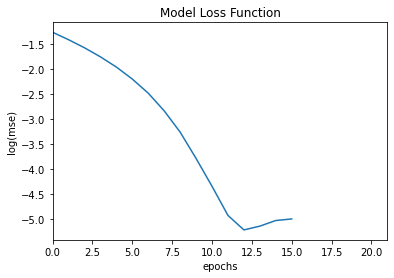

In [1046]:
uno=traindata(dfm,model)

In [1077]:
def evaluate(df, num_points):
    df.fillna(0)
    open_true = df['open_pred']
    open_pred = df['pred_open_next_day']
    close_true = df['close_pred']
    close_pred = df['pred_close_next_day']
    #Create a space to plot 2x2
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
    #numpoint=the last how many points you want to evaluate
    ax[0,0].plot(open_true[-num_points:], open_pred[-num_points:], 'go')
    ax[0,0].set_title('Open')#comparing open pred and open true
    ax[0,0].set_xlabel('Actual')
    ax[0,0].set_ylabel('Pred')
    
    ax[0,1].plot(close_true[-num_points:], close_pred[-num_points:], 'r^')
    ax[0,1].set_title('Close')#comparing close pred and close true
    ax[0,1].set_xlabel('Actual')
    ax[0,1].set_ylabel('Pred')
    
    ax[1,0].plot(open_true[-num_points:],label='Actual')
    ax[1,0].plot(open_pred[-num_points:],label='Pred')
    ax[1,0].legend(loc='upper right')
    
    ax[1,1].plot(close_true[-num_points:],label='Actual')
    ax[1,1].plot(close_pred[-num_points:],label='Pred')
    ax[1,1].legend(loc='upper right')

    fig.suptitle('MODEL PREDICTIONS')
    plt.show()
    plt.close()

    
    mae_open = mae(open_true,open_pred)
    mae_close = mae(close_true, close_pred)
    
    mse_open = mse(open_true, open_pred)
    mse_close = mse(close_true, close_pred)
    
    r2_open = r2(open_true, open_pred)
    r2_close = r2(close_true, close_pred)
    
    print('OPEN PRICES')
    print('\t Mean Absolute Error: {}'.format(mae_open))
    print('\t Mean Squared Error: {}'.format(mse_open))
    print('\t R2 Score: {}'.format(r2_open))
    
    print('CLOSE PRICES')
    print('\t Mean Absolute Error: {}'.format(mae_close))
    print('\t Mean Squared Error: {}'.format(mse_close))
    print('\t R2 Score: {}'.format(r2_close))
    print('')

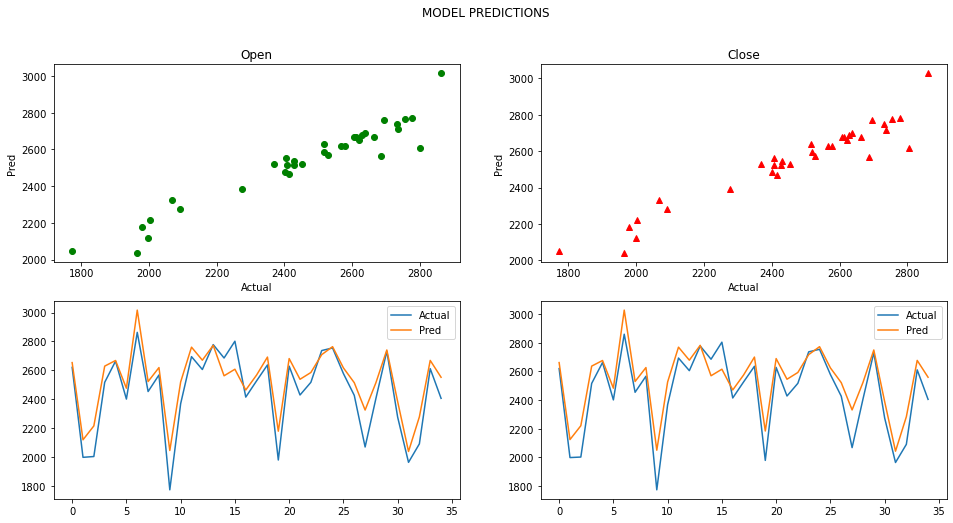

OPEN PRICES
	 Mean Absolute Error: 96.88485714285714
	 Mean Squared Error: 14249.573471428566
	 R2 Score: 0.8118302739826435
CLOSE PRICES
	 Mean Absolute Error: 103.31485714285716
	 Mean Squared Error: 15491.846634285714
	 R2 Score: 0.7953749820955243



In [1078]:
evaluate(uno,35)

# 2. Global JETSX Index Intraday prediction [29-10-2020]

In [1079]:
###Index Futures
#EMEA: FTSE 100 Futures (Z 1), CAC 40 Futures (CF1), DAX 30 Futures (GX1) ,EURO STOXX 50 Futures (VG1), Switzerland Futures (SM1), Spain futures IBEX35 (IB1),
#Turkey:S BIST 30 Futures (A51)
#Asia: Hang Seng Futures (HI1), ASX200 Futures (XP1), SET 50 futures thailand (BC1)
#US: DM1,ES1,NQ1,IS1, PT1(S&P/TSX 60) FUTURES

10000

In [22]:
import datetime

### Factors

In [7]:
factorsJETSX=pd.read_excel('C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\Global JETSX Index\\Index Futures (29-10-2020).xlsx','Futures Formatted')


#### Clean the factors dataset

In [71]:
df=factorsJETSX.copy()
df = df.drop([0]) #Drop first row which is a space 
df.index = range(len(df)) #Select the range row for reindex

N = 16 #Total Futures

equity_list = []
for i in range(N):
    equity_list.append(df.iloc[0, i * 7]) #Row 3 of the Book2 file. Append the TICKER name to the list
print(equity_list) #Check if the output is correct and print its length too
print(len(equity_list))

['Z 1 Index', 'CF1 Index', 'GX1 Index', 'VG1 Index', 'SM1 Index', 'IB1 Index', 'A51 Index', 'HI1 Index', 'IH1 Index', 'BC1 Index', 'XP1 Index', 'DM1 Index', 'ES1 Index', 'NQ1 Index', 'IS1 Index', 'PT1 Index']
16


In [72]:
listo=[]

In [73]:
df=df.drop([0,1])
df.index=range(len(df))
futp=pd.DataFrame()
for i in range(0,16):
    listo.append(df.iloc[:,[i*7,i*7+2]])
    

In [365]:
df

,BarTp,Trade,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,BarTp.1,Trade.1,Unnamed: 9,...,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,BarTp.15,Trade.15,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110
0,2020-04-16 08:00:00,5527,5551,5551,5527,113,NaN,2020-04-16 14:00:00,4347.5,4327,...,34795,34795,1,NaN,2020-04-16 14:00:00,843.7,842.7,844.3,842.3,87
1,2020-04-16 08:05:00,5546.5,5557.5,5560,5545.5,23,NaN,2020-04-16 14:05:00,4331.5,4337,...,34795,34650,2,NaN,2020-04-16 14:05:00,842.9,843.7,843.7,842.2,19
2,2020-04-16 08:10:00,5554.5,5551.5,5559,5551.5,13,NaN,2020-04-16 14:10:00,4343.5,4341.5,...,34715,34270,8,NaN,2020-04-16 14:10:00,844.3,844.7,844.9,843.6,25
3,2020-04-16 08:15:00,5549,5544.5,5550.5,5544,17,NaN,2020-04-16 14:15:00,4342.5,4343,...,34525,34370,13,NaN,2020-04-16 14:15:00,844.6,845,845,844.1,16
4,2020-04-16 08:20:00,5545,5539.5,5545,5539.5,9,NaN,2020-04-16 14:20:00,4344.5,4341,...,34475,34255,10,NaN,2020-04-16 14:20:00,844.8,845.5,845.7,844.7,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
for each in listo:
    each.dropna(inplace=True)

<ipython-input-80-61612a385db6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  each.dropna(inplace=True)


In [92]:
for data in listo:
    data.columns=['Dates','Close']
    data['DateF'] = pd.to_datetime(data['Dates'], format='%Y:%M:%D').dt.date
    data['HourF'] = pd.to_datetime(data['Dates'], format='%Y:%M:%D').dt.time
    data=data[['Dates','Close','DateF','HourF']]

<ipython-input-92-9333161bc8fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DateF'] = pd.to_datetime(data['Dates'], format='%Y:%M:%D').dt.date
<ipython-input-92-9333161bc8fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HourF'] = pd.to_datetime(data['Dates'], format='%Y:%M:%D').dt.time


In [106]:
USlisto=[] #be caerful usdf2 and emeadf2 is also use later lol
EMEAlisto=[]
for data in listo:
    EMEAdf2=pd.DataFrame(columns=['Dates','Close','DateF','HourF'])
    USdf2=pd.DataFrame(columns=['Dates','Close','DateF','HourF'])
    for i in data.index:
        if is_time_between(start1,end1,data.loc[i]['HourF']) and is_time_between(start2,end2,data.loc[i]['HourF']):
            EMEAdf2=EMEAdf2.append(data.loc[i])
            USdf2=USdf2.append(data.loc[i])
        elif is_time_between(start1,end1,data.loc[i]['HourF']):
            EMEAdf2=EMEAdf2.append(data.loc[i])
        elif is_time_between(start2,end2,data.loc[i]['HourF']):
            USdf2=USdf2.append(data.loc[i])
    EMEAlisto.append(EMEAdf2)
    USlisto.append(USdf2)

In [256]:
compare(EMEAlisto[0]['Dates'],ES['Dates'])

2020-05-08 15:00:00
2020-05-08 15:05:00
2020-05-08 15:10:00
2020-05-08 15:15:00
2020-05-08 15:20:00
2020-05-08 15:25:00
2020-05-08 15:30:00
2020-05-08 15:35:00
2020-05-08 15:40:00
2020-05-08 15:45:00
2020-05-08 15:50:00
2020-05-08 15:55:00
2020-05-08 16:00:00
2020-05-08 16:05:00
2020-05-08 16:10:00
2020-05-08 16:15:00
2020-05-08 16:20:00
2020-05-08 16:25:00
2020-05-08 16:30:00
2020-05-08 16:35:00
2020-05-08 16:40:00
2020-05-08 16:45:00
2020-05-08 16:50:00
2020-05-08 16:55:00
2020-05-08 17:00:00
2020-05-08 17:05:00
2020-05-08 17:10:00
2020-05-08 17:15:00
2020-05-08 17:20:00
2020-05-08 17:25:00
2020-05-08 17:30:00
2020-05-08 17:35:00
2020-05-08 17:40:00
2020-05-08 17:45:00
2020-05-08 17:50:00
2020-05-08 17:55:00
2020-05-08 18:00:00
2020-05-08 18:05:00
2020-05-08 18:10:00
2020-05-08 18:15:00
2020-05-08 18:20:00
2020-05-08 18:25:00
2020-05-08 18:30:00
2020-05-08 18:35:00
2020-05-08 18:40:00
2020-05-08 18:45:00
2020-05-08 18:50:00
2020-05-08 18:55:00
2020-05-08 19:00:00
2020-05-08 19:05:00


In [274]:
EMEAlisto[9]

,Dates,BC1 Index,DateF,HourF
34,2020-04-16 15:10:00,815.7,2020-04-16,15:10:00
35,2020-04-16 15:15:00,815.7,2020-04-16,15:15:00
36,2020-04-16 15:20:00,815.8,2020-04-16,15:20:00
37,2020-04-16 15:25:00,816.4,2020-04-16,15:25:00
38,2020-04-16 15:30:00,815.0,2020-04-16,15:30:00
...,...,...,...,...
8650,2020-10-28 17:35:00,752.9,2020-10-28,17:35:00
8651,2020-10-28 17:40:00,753.7,2020-10-28,17:40:00
8652,2020-10-28 17:45:00,753.3,2020-10-28,17:45:00
8653,2020-10-28 17:50:00,752.5,2020-10-28,17:50:00


,Unnamed: 0,Dates,Open,Close,High,Low
0,0,2020-04-16 15:00:00,2148.50,2122.05,2148.50,2122.05
1,1,2020-04-16 15:05:00,2123.57,2105.02,2123.57,2101.19
2,2,2020-04-16 15:10:00,2106.24,2121.64,2128.79,2106.24
3,3,2020-04-16 15:15:00,2124.72,2106.45,2126.11,2103.79
4,4,2020-04-16 15:20:00,2107.09,2089.86,2110.40,2089.86
...,...,...,...,...,...,...
10818,10818,2020-10-23 21:10:00,2812.85,2813.63,2814.57,2812.85
10819,10819,2020-10-23 21:15:00,2813.64,2814.41,2814.41,2813.40
10820,10820,2020-10-23 21:20:00,2814.42,2813.33,2815.18,2813.08
10821,10821,2020-10-23 21:25:00,2813.03,2812.74,2813.03,2810.96


In [117]:
c=0
for name in equity_list:
    EMEAlisto[c].columns=['Dates',name,'DateF','HourF']
    USlisto[c].columns=['Dates',name,'DateF','HourF']
    c+=1

### JETSX Index from April 16 to 29 Oct

In [4]:
JETSX2=pd.read_excel('C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\Global JETSX Index\\Index Futures (29-10-2020).xlsx','JETSX Index Formated')


In [19]:
JETSX2
data2=JETSX2.copy()
data2['DateF'] = pd.to_datetime(data2['Dates'], format='%Y:%M:%D').dt.date
data2['HourF'] = pd.to_datetime(data2['Dates'], format='%Y:%M:%D').dt.time
data2=data2[['Dates','Open','Close','High','Low','DateF','HourF']]

In [146]:
EMEAdf2=pd.DataFrame(columns=['Dates','Open','Close','High','Low','DateF','HourF'])
USdf2=pd.DataFrame(columns=['Dates','Open','Close','High','Low','DateF','HourF'])
start1=datetime.datetime.strptime('15:00:00', '%H:%M:%S').time()
end1=datetime.datetime.strptime('21:30:00', '%H:%M:%S').time()
start2=datetime.datetime.strptime('21:30:00', '%H:%M:%S').time()
end2=datetime.datetime.strptime('04:00:00', '%H:%M:%S').time()
for i in data2.index:
    if is_time_between(start1,end1,data2.loc[i]['HourF']) and is_time_between(start2,end2,data2.loc[i]['HourF']):
        EMEAdf2=EMEAdf2.append(data2.loc[i])
        USdf2=USdf2.append(data2.loc[i])
    elif is_time_between(start1,end1,data2.loc[i]['HourF']):
        EMEAdf2=EMEAdf2.append(data2.loc[i])
    elif is_time_between(start2,end2,data2.loc[i]['HourF']):
        USdf2=USdf2.append(data2.loc[i])
        

In [150]:
#USdf2['Dates']=USdf2['Dates']-timedelta(hours=6, minutes=30) ##1 time only if not repeat 


In [157]:
USdf2


,Dates,Open,Close,High,Low,DateF,HourF
78,2020-04-16 15:00:00,2148.50,2122.05,2148.50,2122.05,2020-04-16,21:30:00
79,2020-04-16 15:05:00,2123.57,2105.02,2123.57,2101.19,2020-04-16,21:35:00
80,2020-04-16 15:10:00,2106.24,2121.64,2128.79,2106.24,2020-04-16,21:40:00
81,2020-04-16 15:15:00,2124.72,2106.45,2126.11,2103.79,2020-04-16,21:45:00
82,2020-04-16 15:20:00,2107.09,2089.86,2110.40,2089.86,2020-04-16,21:50:00
...,...,...,...,...,...,...,...
22626,2020-10-28 21:10:00,2504.75,2502.01,2505.30,2502.01,2020-10-29,03:40:00
22627,2020-10-28 21:15:00,2501.71,2497.77,2501.84,2497.37,2020-10-29,03:45:00
22628,2020-10-28 21:20:00,2496.46,2495.05,2497.18,2493.98,2020-10-29,03:50:00
22629,2020-10-28 21:25:00,2494.99,2492.28,2494.99,2492.28,2020-10-29,03:55:00


In [225]:
compare(EMEAdf3['Dates'],USdf3['Dates'])

2020-10-26 15:00:00
2020-10-26 15:05:00
2020-10-26 15:10:00
2020-10-26 15:15:00
2020-10-26 15:20:00
2020-10-26 15:25:00
2020-10-26 15:30:00
2020-10-26 15:35:00
2020-10-26 15:40:00
2020-10-26 15:45:00
2020-10-26 15:50:00
2020-10-26 15:55:00
2020-10-27 15:00:00
2020-10-27 15:05:00
2020-10-27 15:10:00
2020-10-27 15:15:00
2020-10-27 15:20:00
2020-10-27 15:25:00
2020-10-27 15:30:00
2020-10-27 15:35:00
2020-10-27 15:40:00
2020-10-27 15:45:00
2020-10-27 15:50:00
2020-10-27 15:55:00
2020-10-28 15:00:00
2020-10-28 15:05:00
2020-10-28 15:10:00
2020-10-28 15:15:00
2020-10-28 15:20:00
2020-10-28 15:25:00
2020-10-28 15:30:00
2020-10-28 15:35:00
2020-10-28 15:40:00
2020-10-28 15:45:00
2020-10-28 15:50:00
2020-10-28 15:55:00


In [188]:
USdf3=USdf2[['Dates','Open','Close','High','Low']].copy()
USdf3.loc[len(USdf3.index)+1]=[pd.to_datetime('2020-04-29 15:00:00'),2280.12,2276,2302.52,2275.96]
USdf3.loc[len(USdf3.index)+1]=[pd.to_datetime('2020-06-04 15:00:00'),2612.16,2613.6,2621.9,2611.1]
USdf3.loc[len(USdf3.index)+1]=[pd.to_datetime('2020-06-04 15:05:00'),2619.11,2620.846,2630.23,2618]
USdf3.loc[len(USdf3.index)+1]=[pd.to_datetime('2020-06-04 15:10:00'),2626.06,2628.093,2638.57,2624.893]
USdf3.loc[len(USdf3.index)+1]=[pd.to_datetime('2020-06-05 15:00:00'),3092.478,3072.108,3093.15,3061.46]
USdf3.loc[len(USdf3.index)+1]=[pd.to_datetime('2020-06-05 15:05:00'),3127.581,3103.731,3128.275,3091.405]
USdf3.loc[len(USdf3.index)+1]=[pd.to_datetime('2020-06-05 15:10:00'),3162.684,3135.354,3163.4,3121.35]
USdf3.loc[len(USdf3.index)+1]=[pd.to_datetime('2020-06-05 15:15:00'),3197.787,3166.977,3198.525,3151.295]
USdf3.loc[len(USdf3.index)+1]=[pd.to_datetime('2020-06-11 15:00:00'),2620.483,2634.999,2651.534,2611.626]
USdf3.loc[len(USdf3.index)+1]=[pd.to_datetime('2020-08-11 15:00:00'),2725.119,2709.82,2731.512,2709.8]
USdf3.loc[len(USdf3.index)+1]=[pd.to_datetime('2020-08-27 17:10:00'),2686.352033,2691.043836,2691.210458,2686.254358]
USdf3.loc[len(USdf3.index)+1]=[pd.to_datetime('2020-08-27 17:15:00'),2688.173388,2691.51306,2691.790764,2688.010596]
USdf3.loc[len(USdf3.index)+1]=[pd.to_datetime('2020-08-27 17:20:00'),2690.12484,2692.0158,2692.41252,2689.89228]
USdf3.loc[len(USdf3.index)+1]=[pd.to_datetime('2020-08-27 17:25:00'),2691.75105,2692.43475,2692.93065,2691.46035]
USdf3.loc[len(USdf3.index)+1]=[pd.to_datetime('2020-08-27 17:30:00'),2692.6545,2692.6675,2693.2185,2692.3315]
USdf3.loc[len(USdf3.index)+1]=[pd.to_datetime('2020-08-27 17:40:00'),2692.115,2691.54,2692.235,2691.31]
USdf3.loc[len(USdf2.index)+1]=[pd.to_datetime('2020-08-27 18:45:00'),2672.255,2674.05,2674.87,2671.7]


In [192]:
USdf3.loc[11060]=[pd.to_datetime('2020-04-29 15:00:00'),2280.12,2276,2302.52,2275.96]

In [194]:
USdf3=USdf3.sort_values(by=['Dates'])
USdf3=USdf3.reset_index(drop=True)

In [200]:
EMEAdf3=EMEAdf2[['Dates','Open','Close','High','Low']].copy()


In [204]:
EMEAdf3.loc[11020]=[pd.to_datetime('2020-04-29 21:30:00'),2280.12,2276,2302.52,2275.96]
EMEAdf3.loc[11021]=[pd.to_datetime('2020-06-04 21:30:00'),2612.16,2613.6,2621.9,2611.1]
EMEAdf3.loc[11022]=[pd.to_datetime('2020-06-05 21:30:00'),3092.478,3072.108,3093.15,3061.46]
EMEAdf3.loc[11023]=[pd.to_datetime('2020-06-11 21:30:00'),2620.483,2634.999,2651.534,2611.626]
EMEAdf3.loc[11024]=[pd.to_datetime('2020-08-11 21:30:00'),2725.119,2709.82,2731.512,2709.8]

In [221]:
EMEAdf3=EMEAdf3.sort_values(by=['Dates'])
EMEAdf3=EMEAdf3.reset_index(drop=True)
EMEAdf3

,Dates,Open,Close,High,Low
0,2020-04-16 15:00:00,2200.16,2199.78,2200.83,2199.27
1,2020-04-16 15:05:00,2199.84,2199.98,2201.69,2199.80
2,2020-04-16 15:10:00,2199.60,2198.56,2199.60,2198.20
3,2020-04-16 15:15:00,2198.17,2198.98,2199.32,2198.17
4,2020-04-16 15:20:00,2198.89,2199.84,2199.90,2198.82
...,...,...,...,...,...
11024,2020-10-28 21:10:00,2591.33,2591.19,2591.33,2591.09
11025,2020-10-28 21:15:00,2591.17,2590.87,2591.24,2590.74
11026,2020-10-28 21:20:00,2590.73,2591.18,2591.18,2590.73
11027,2020-10-28 21:25:00,2591.27,2591.62,2591.63,2591.02


In [220]:
EMEAdf3.loc[11025]=[pd.to_datetime('2020-07-21 15:40:00'),2433.67,2432.48,2433.79,2432.45]
EMEAdf3.loc[11026]=[pd.to_datetime('2020-07-21 15:45:00'),2432.51,2432.96,2433.32,2432.51]
EMEAdf3.loc[11027]=[pd.to_datetime('2020-07-21 15:50:00'),2433.12,2432.69,2433.23,2432.48]
EMEAdf3.loc[11028]=[pd.to_datetime('2020-07-21 15:55:00'),2432.52,2432.57,2432.97,2432.52]
EMEAdf3.loc[11029]=[pd.to_datetime('2020-07-21 16:00:00'),2432.48,2432.23,2432.48,2431.92]





In [227]:
len(USdf3)

11060

In [223]:
EMEAdf3.to_excel('C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\Global JETSX Index\\LASSO\\cleanJET.xlsx')

In [224]:
USdf3.to_excel('C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\Global JETSX Index\\LASSO\\cleanJET2.xlsx')

In [242]:
AS=pd.read_excel('C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\Global JETSX Index\\LASSO\\JETSXEMEAClean.xlsx')
ES=pd.read_excel('C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\Global JETSX Index\\LASSO\\JETSXUSClean.xlsx')

In [250]:
ES['Dates']

0       2020-04-16 15:00:00
1       2020-04-16 15:05:00
2       2020-04-16 15:10:00
3       2020-04-16 15:15:00
4       2020-04-16 15:20:00
                ...        
10818   2020-10-23 21:10:00
10819   2020-10-23 21:15:00
10820   2020-10-23 21:20:00
10821   2020-10-23 21:25:00
10822   2020-10-23 21:30:00
Name: Dates, Length: 10823, dtype: datetime64[ns]

In [249]:
#us and emea jetsx data is clean find in excel JETSXEMEAClean.xlsx and us also

### Clean Data Final

In [278]:
EMEAjetsx=pd.read_excel('C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\Global JETSX Index\\LASSO\\JETSXEMEAClean.xlsx')
USjetsx=pd.read_excel('C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\Global JETSX Index\\LASSO\\JETSXUSClean.xlsx')

In [279]:
USjetsx

,Unnamed: 0,Dates,Open,Close,High,Low
0,0,2020-04-16 15:00:00,2148.50,2122.05,2148.50,2122.05
1,1,2020-04-16 15:05:00,2123.57,2105.02,2123.57,2101.19
2,2,2020-04-16 15:10:00,2106.24,2121.64,2128.79,2106.24
3,3,2020-04-16 15:15:00,2124.72,2106.45,2126.11,2103.79
4,4,2020-04-16 15:20:00,2107.09,2089.86,2110.40,2089.86
...,...,...,...,...,...,...
10818,10818,2020-10-23 21:10:00,2812.85,2813.63,2814.57,2812.85
10819,10819,2020-10-23 21:15:00,2813.64,2814.41,2814.41,2813.40
10820,10820,2020-10-23 21:20:00,2814.42,2813.33,2815.18,2813.08
10821,10821,2020-10-23 21:25:00,2813.03,2812.74,2813.03,2810.96


In [286]:
date_list=list(EMEAjetsx['Dates'])
columns=['Date','USJetsx','EMEAjetsx']+equity_list

In [298]:

clean_df=pd.DataFrame(columns=columns,index=range(len(EMEAjetsx)))
clean_df['Date']=EMEAjetsx['Dates']
clean_df['USJetsx']=USjetsx['Close']
clean_df['EMEAjetsx']=EMEAjetsx['Close']

In [304]:
date_list=list(EMEAjetsx['Dates'])
columns=['Date','USJetsx','EMEAjetsx']+equity_list
clean_df=pd.DataFrame(columns=columns,index=range(len(EMEAjetsx)))
clean_df['Date']=EMEAjetsx['Dates']
clean_df['USJetsx']=USjetsx['Close']
clean_df['EMEAjetsx']=EMEAjetsx['Close']
clean_df.index=date_list

In [331]:
for i in range(16):
    print(equity_list[i])
    right=EMEAlisto[i][['Dates',equity_list[i]]]
    right.index=list(right['Dates'])
    value=math.nan
    for date in date_list:
        if date not in right.index:
            clean_df.loc[date,equity_list[i]]=value
        else:
            value=right.loc[date,equity_list[i]]
            clean_df.loc[date,equity_list[i]]=right.loc[date,equity_list[i]]
            

Z 1 Index
CF1 Index
GX1 Index
VG1 Index
SM1 Index
IB1 Index
A51 Index
HI1 Index
IH1 Index
BC1 Index
XP1 Index
DM1 Index
ES1 Index
NQ1 Index
IS1 Index
PT1 Index


In [349]:
#clear NAN 
clean_df.columns[clean_df.isnull().sum()>5]
clean_df.drop(['IS1 Index'],axis=1,inplace=True)

In [357]:
#clean some missing value manually 
clean_df.iloc[0,13]=clean_df.iloc[1,13]
clean_df.iloc[0,12]=clean_df.iloc[1,12]=clean_df.iloc[2,12]

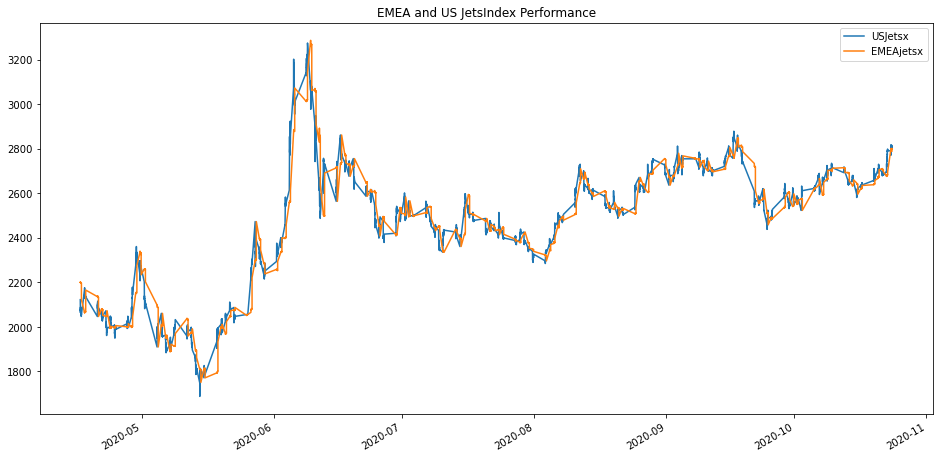

In [758]:
clean_df['USJetsx'].plot(figsize=(16,8))
clean_df['EMEAjetsx'].plot(figsize=(16,8))
plt.title('EMEA and US JetsIndex Performance')
plt.legend()

### Pre Processing

In [382]:
#Split
from sklearn.model_selection import train_test_split,TimeSeriesSplit,GridSearchCV
#Feature selection / dimension reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV,SelectPercentile,mutual_info_classif
#Performance evaluation
from sklearn import metrics



In [428]:
clean_df.iloc[:,3:]=clean_df.iloc[:,3:].astype('float64') #convert object to float64 type

In [488]:
clean_df.to_excel('C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\Global JETSX Index\\LASSO\\cleanLASSO.xlsx',index=False)


In [424]:
X_train,X_test,y_train,y_test=train_test_split(clean_df.iloc[:,2:],clean_df.iloc[:,1],test_size=0.30, shuffle=False)

In [425]:
print(X_train.shape,X_test.shape)

(7576, 16) (3247, 16)


### Standardization

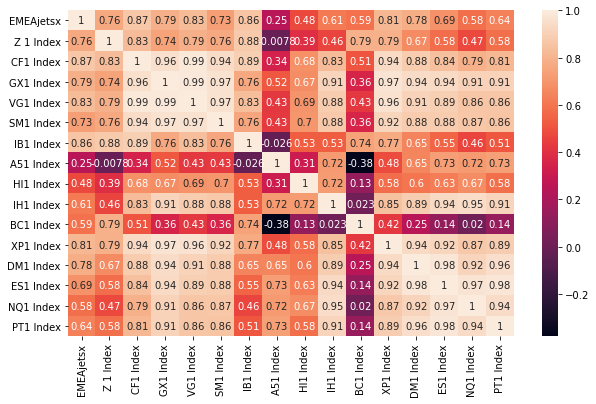

In [443]:
import seaborn
fig,ax=plt.subplots(figsize=(10,6))
seaborn.heatmap(X_train.corr(),annot=True)

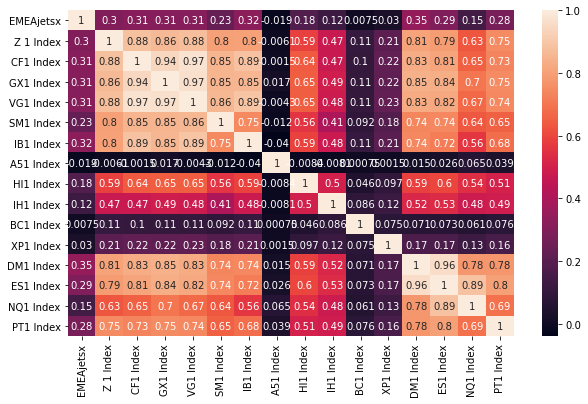

In [937]:
reg=clean_df.iloc[:,2:].copy()
regret=reg.pct_change().dropna()
fig,ax=plt.subplots(figsize=(10,6))
seaborn.heatmap(regret.corr(),annot=True)

In [936]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
regret['ES1DM1']=regret.apply(lambda x:x['ES1 Index']-x['DM1 Index'],axis=1)
#regret['VG1CF1GX1']=regret.apply(lambda x:x['VG1 Index']-x['CF1 Index']-x['GX1 Index'],axis=1)
calc_vif(regret.drop(['SM1 Index','IB1 Index','CF1 Index','GX1 Index','ES1 Index','DM1 Index'],axis=1))

,variables,VIF
0,EMEAjetsx,1.175909
1,Z 1 Index,4.854755
2,VG1 Index,5.649070
3,A51 Index,1.012226
4,HI1 Index,1.929346
5,IH1 Index,1.545382
6,BC1 Index,1.020155
7,XP1 Index,1.067326
8,NQ1 Index,2.969601
9,PT1 Index,2.951278


In [941]:
calc_vif(regret)

,variables,VIF
0,EMEAjetsx,1.223574
1,Z 1 Index,5.457784
2,CF1 Index,22.478449
3,GX1 Index,18.140918
4,VG1 Index,35.540408
5,SM1 Index,4.223544
6,IB1 Index,5.441799
7,A51 Index,1.026594
8,HI1 Index,1.950823
9,IH1 Index,1.586042


In [940]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Forces it to explain >99% of variance
# Fit the PCA model
pca.fit(regret)
print(f'PCA Explained Variance: {pca.explained_variance_ratio_}\n')
print(f'PCA No. Components: {pca.n_components_}\n')

PCA Explained Variance: [0.99323557]

PCA No. Components: 1



In [ ]:

# The implementation of the function in RegressionFunction.py but with some added plotting features
def FitRegressionModel(pca, model, training, testing, alpha = False):    
    estimators = []
    Y_pred = []
    Y_actual = []
    X_training_proj = pca.transform(training)

    # Iterate over all principle components:
    for i in range(pca.n_components_):

        # Here, we lag X compared to Y. X will be one time period behind Y
        X = X_training_proj[:-1, i]
        Y = X_training_proj[1:, i]
        
        Y_actual.append(Y)
        X = sm.add_constant(X)
        
        if alpha:
            test_range = np.arange(5)
            param_grid = {"alpha": test_range}
            grid_search = GridSearchCV(model,param_grid)
            grid_search.fit(X, Y)
            best_params = grid_search.best_params_
        
        est = model.fit(X, Y)
        estimators.append(est)
        Y_pred.append(model.predict(X))
        print("Estimator {}: R2 = {:.3f}\n".format(i, model.score(X,Y)))
    
    Y_pred = np.array(Y_pred).transpose()
    Y_actual = np.array(Y_actual).transpose()
    
    Y_actual_original_space = pca.inverse_transform(Y_actual)
    Y_pred_original_space = pca.inverse_transform(Y_pred)

    # Compute sum of squared error:
    train_sse = np.sum((Y_pred_original_space - Y_actual_original_space)** 2)
    print(f'Sum of squared error: {train_sse}\n')
    testing_proj = pca.transform(testing)
    
    testing_prediction = []
    for i in range(pca.n_components_):
        # Create a data row - remember our estimators have a constant, so we need that
        row = [1, testing_proj[:,i]]
        print(row)
        row = np.reshape(row, (1, 2))
        # Predict this row
        p = model.predict(row)
        # Transofrm the (1, 1) result into just a (1,), and append to our predictions

        # Potential error here:
        testing_prediction.append(p[0])  # If this errors, try p[0][0]
        
    predictions = pca.inverse_transform(testing_prediction)
    pred_sse = np.sum((predictions - testing.values)** 2)
    actual_pred = {'Predicted':predictions, 'Actual':[x[0] for x in testing.transpose().values]}
    actual_pred = pd.DataFrame(actual_pred, index = testing.columns)
    print(actual_pred)
    print(f'\nPrediction sum of squared error: {pred_sse}\n')
    return actual_pred['Predicted']

In [696]:
##Simple Regression
us=clean_df.iloc[:,1].copy()
usret=us.pct_change().dropna()
reg=regret.copy()
model=sm.OLS(usret,sm.add_constant(reg[['Z 1 Index','IB1 Index','HI1 Index','XP1 Index','NQ1 Index','ES1DM1']]))
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                USJetsx   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     233.8
Date:                Tue, 03 Nov 2020   Prob (F-statistic):          7.14e-282
Time:                        08:38:26   Log-Likelihood:                 45006.
No. Observations:               10822   AIC:                        -9.000e+04
Df Residuals:                   10815   BIC:                        -8.995e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.668e-05   3.64e-05      1.009      0.313   -3.46e-05       0.000
Z 1 Index      0.3323      0.043      7.652      0.000       0.247       0.417
IB1 Index      0.2424      0.035      6.985      0.000       0.174       0.310
HI1 Index      0.4439      0.029     15.108      0.000       0.386       0.502
XP1 Index     -0.1973      0.025     -7.852      0.000      -0.247      -0.148
NQ1 Index     -0.1124      0.029     -3.862      0.000      -0.170      -0.055
ES1DM1        -0.1981      0.090     -2.207      0.027      -0.374      -0.022
==============================================================================
Omnibus:                     8282.287   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5449985.059
Skew:                           2.435   Prob(JB):                         0.00
Kurtosis:                     112.830   Cond. No.                     2.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm.fit(retfactor,retObj)

### Lasso Model

In [843]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
# define model
lm=LinearRegression()
lm_lasso = Lasso(alpha=1.1562801312073753e-06)
lm_ridge = Ridge()
lm_elastic = ElasticNet(alpha=1.0)
# define model evaluation method using repeated 10 fold cross validation


In [842]:
X_train,X_test,y_train,y_test=train_test_split(clean_df.iloc[:,2:],clean_df.iloc[:,[1]],test_size=0.30, shuffle=False)

In [644]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
x_norm = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
#scale the model input

In [645]:
scaler1 = MinMaxScaler()
y_norm = pd.DataFrame(scaler1.fit_transform(y_train), columns=y_train.columns)
#scale the model output

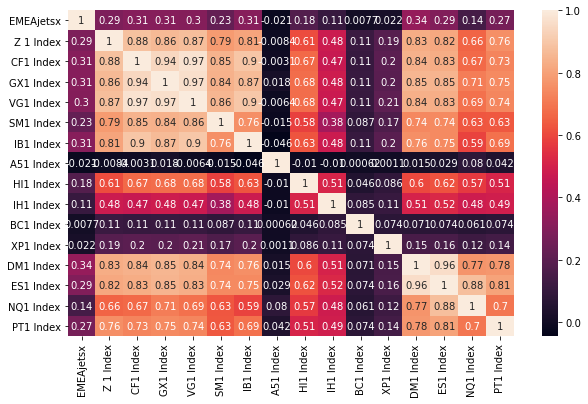

In [841]:
retfactor=X_train.pct_change().dropna()
retObj=y_train.pct_change().dropna()
fig,ax=plt.subplots(figsize=(10,6))
seaborn.heatmap(retfactor.corr(),annot=True)

tretfactor=X_test.pct_change().dropna()
tretObj=y_test.pct_change().dropna()



In [844]:
lm.fit(retfactor,retObj)
lm_lasso.fit(retfactor,retObj)
lm_ridge.fit(retfactor,retObj)

lm_elastic.fit(retfactor,retObj)

ElasticNet()

In [845]:
lm.coef_

array([[ 2.77025042e-03,  3.62681262e-01, -1.67047452e-01,
         1.40365566e-01, -2.01847067e-01, -1.09230076e-01,
         4.18212564e-01,  3.80368747e-04,  4.74240491e-01,
        -2.22305359e-01, -7.21042995e-02, -2.29279783e-01,
        -4.49296274e-01,  1.44023912e+00, -6.38971036e-01,
        -1.13179754e-01]])

In [839]:
X_train.columns

Index(['EMEAjetsx', 'Z 1 Index', 'CF1 Index', 'GX1 Index', 'VG1 Index',
       'SM1 Index', 'IB1 Index', 'A51 Index', 'HI1 Index', 'IH1 Index',
       'BC1 Index', 'XP1 Index', 'DM1 Index', 'ES1 Index', 'NQ1 Index',
       'PT1 Index'],
      dtype='object')

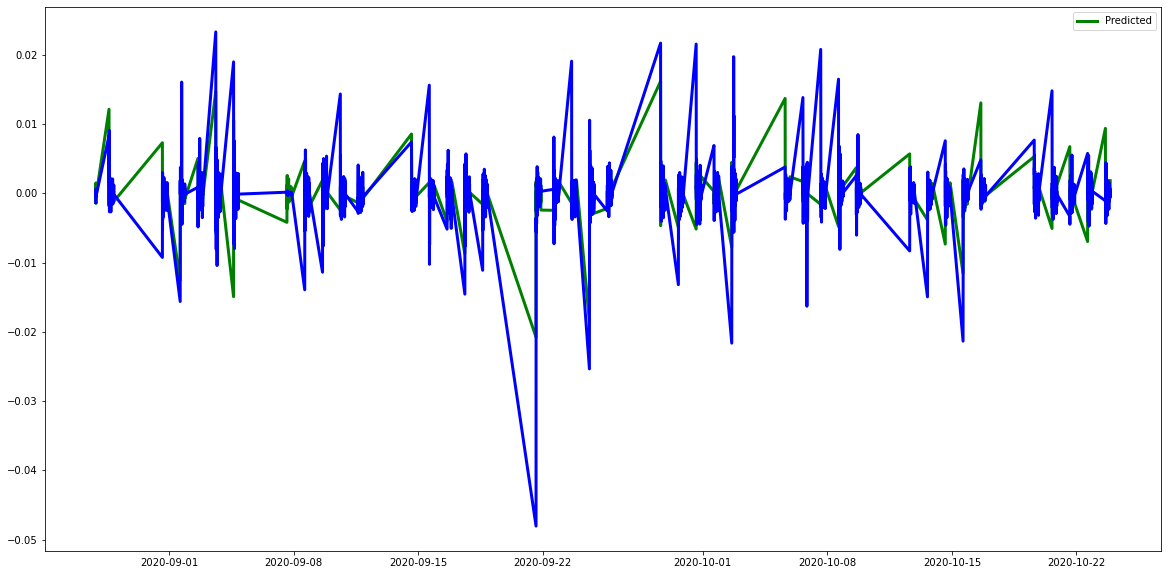

In [890]:
plt.figure(figsize=(20,10))
y_pred1=lm.predict(tretfactor)
plt.plot(tretObj.index, y_pred1, color='green',
         linewidth=3,label='Predicted')
plt.plot(tretObj.index, tretObj, color='blue',
         linewidth=3)
plt.legend()

### US Futures only

In [919]:
retfactor['VG1 Index']
retfactor[['CF1 Index','GX1 Index','IB1 Index']]
model=sm.OLS(retfactor['VG1 Index'],sm.add_constant(retfactor[['Z 1 Index','CF1 Index','GX1 Index','IB1 Index','SM1 Index']]))
model.fit().summary()
model2=sm.OLS(retObj,sm.add_constant(retfactor[['DM1 Index','NQ1 Index','ES1 Index']]))
model2.fit().summary()
model2.fit().params[3]

1.6035006743339317

In [920]:
lm2=LinearRegression()
lm2.fit(retfactor[['DM1 Index','NQ1 Index','ES1 Index']],retObj)

LinearRegression()

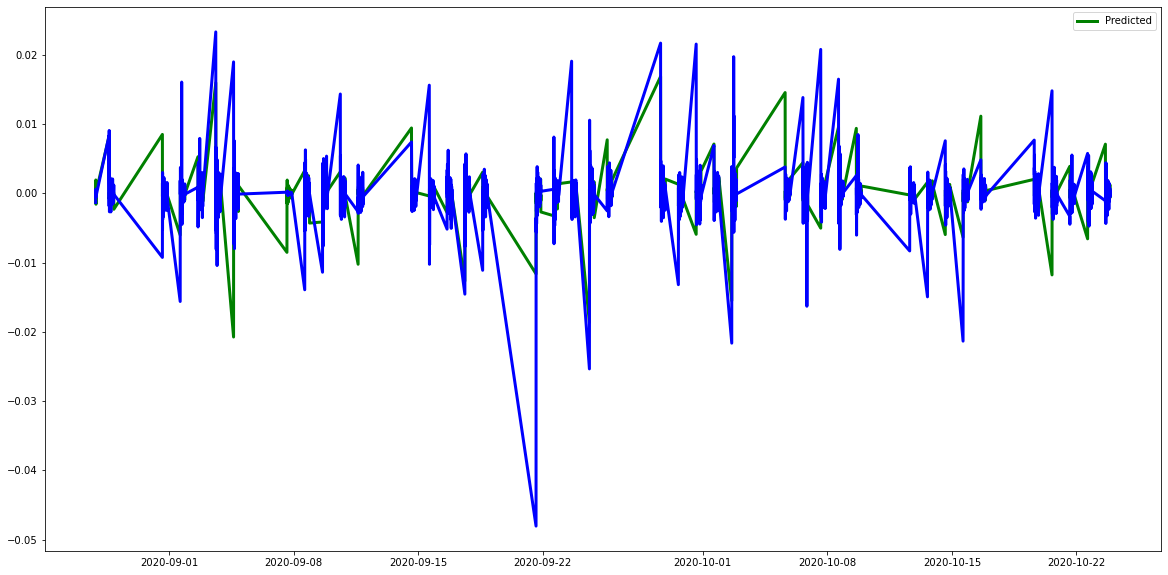

In [924]:

plt.figure(figsize=(20,10))
y_pred1=lm2.predict(tretfactor[['DM1 Index','NQ1 Index','ES1 Index']])
plt.plot(tretObj.index, y_pred1, color='green',
         linewidth=3,label='Predicted')
plt.plot(tretObj.index, tretObj, color='blue',
         linewidth=3)
plt.legend()

In [847]:
plt.figure(figsize=(8,8))
ft_importances_lm=pd.Series(lm.coef_,index=X_train.columns)
ft_importances_lm.plot(kind='barh')
plt.show()
plt.figure(figsize=(8,8))
ft_importances_lm=pd.Series(lm_lasso.coef_,index=X_train.columns)
ft_importances_lm.plot(kind='barh')
plt.show()


ValueError: Length of passed values is 1, index implies 16.

<Figure size 576x576 with 0 Axes>

The optimal alpha value is :1.1562801312073753e-06


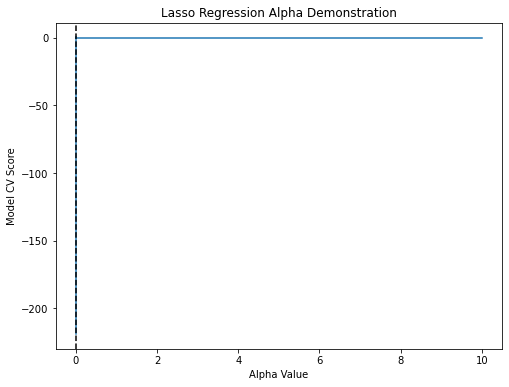

In [702]:
from sklearn.model_selection import GridSearchCV
# Create an array of alpha values to test
# Start np.linspace value is 10**-10 because a value of 0 throws warnings
alphas = np.logspace(-10, 1, 1000,base=10)
# Create dictionary key,value pair of alpha values
tuned_parameters = [{'alpha': alphas}]
# Specify number of folds for cross_validation
n_folds = 5
# Create grid search instance using desired variables
clf_lasso = GridSearchCV(lm_lasso, tuned_parameters, cv=5, refit=True)
clf_lasso.fit(retf
              
              
              actor,retObj)
lasso_scores = clf_lasso.cv_results_['mean_test_score']
# Plot the results
plt.figure().set_size_inches(8, 6)
plt.plot(alphas, lasso_scores)
plt.xlabel('Alpha Value')
plt.ylabel('Model CV Score')
plt.title('Lasso Regression Alpha Demonstration')
plt.axvline(clf_lasso.best_params_['alpha'], color='black', linestyle='--')
print(f'The optimal alpha value is :{clf_lasso.best_params_["alpha"]}')

### R2 Value

In [836]:
lm_lasso.coef_

array([ 1.53889270e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.90074807e-01, -1.50572776e-05,
        1.79787904e-01,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.48594092e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

### Quantile Regression

In [827]:
import statsmodels.formula.api as smf
model=sm.OLS(y_train,sm.add_constant(X_train))
model.fit().summary()
mod=smf.quantreg(y_train,sm.add_constant(X_train))
res=mod.fit(q=.5)
print(res.summary())

PatsyError: model is missing required outcome variables

In [853]:
clean_df.drop(['BC1 Index'],axis=1)

,Date,USJetsx,EMEAjetsx,Z 1 Index,CF1 Index,GX1 Index,VG1 Index,SM1 Index,IB1 Index,A51 Index,HI1 Index,IH1 Index,XP1 Index,DM1 Index,ES1 Index,NQ1 Index,PT1 Index
2020-04-16 15:00:00,2020-04-16 15:00:00,2122.05,2199.78,5632.0,4376.5,10395.0,2810.0,9295.0,6905.0,115.525,24106.0,9032.5,5426.0,23598.0,2800.00,8675.00,849.7
2020-04-16 15:05:00,2020-04-16 15:05:00,2105.02,2199.98,5621.5,4359.0,10362.0,2801.0,9276.0,6902.0,115.425,24067.0,9018.0,5426.0,23550.0,2794.75,8662.00,848.6
2020-04-16 15:10:00,2020-04-16 15:10:00,2121.64,2198.56,5604.5,4349.5,10340.5,2796.0,9277.0,6887.0,115.250,24029.0,9010.5,5407.0,23522.0,2790.50,8654.75,847.4
2020-04-16 15:15:00,2020-04-16 15:15:00,2106.45,2198.98,5599.5,4344.0,10347.5,2796.0,9286.0,6891.0,115.175,24020.0,9000.0,5410.0,23517.0,2790.50,8655.00,846.5
2020-04-16 15:20:00,2020-04-16 15:20:00,2089.86,2199.84,5616.0,4354.8,10374.5,2802.0,9300.0,6896.0,115.100,24030.0,9032.5,5427.0,23549.0,2794.00,8663.00,847.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-23 21:10:00,2020-10-23 21:10:00,2813.63,2799.96,5846.5,4924.5,12686.0,3206.0,10009.0,6871.0,1308.750,24889.0,11965.0,6174.0,28345.0,3459.50,11674.25,969.0
2020-10-23 21:15:00,2020-10-23 21:15:00,2814.41,2799.36,5846.5,4923.5,12685.0,3206.0,10010.0,6868.0,1305.500,24884.0,11965.0,6174.0,28341.0,3459.25,11676.75,969.0
2020-10-23 21:20:00,2020-10-23 21:20:00,2813.33,2799.65,5846.0,4925.5,12686.0,3206.0,10012.0,6868.0,1306.750,24885.0,11965.0,6174.0,28343.0,3460.00,11679.75,969.0
2020-10-23 21:25:00,2020-10-23 21:25:00,2812.74,2800.57,5845.0,4924.5,12682.5,3206.0,10009.0,6870.0,1305.750,24885.0,11965.0,6174.0,28335.0,3459.25,11675.75,968.7


In [849]:
tretfactor


,EMEAjetsx,Z 1 Index,CF1 Index,GX1 Index,VG1 Index,SM1 Index,IB1 Index,A51 Index,HI1 Index,IH1 Index,BC1 Index,XP1 Index,DM1 Index,ES1 Index,NQ1 Index,PT1 Index
2020-08-27 21:00:00,-0.000012,0.000083,0.000298,-0.000038,0.000299,0.000194,0.000847,0.000000,0.000199,0.000431,0.0,-0.000164,0.000071,0.000000,-0.000460,-0.000199
2020-08-27 21:05:00,-0.000004,-0.001490,-0.001391,-0.001330,-0.001496,-0.001261,-0.001692,-0.000997,-0.000675,0.000086,0.0,-0.000822,-0.000743,-0.001007,-0.001212,-0.000299
2020-08-27 21:10:00,0.000273,0.001160,0.000995,0.001027,0.001199,0.000680,0.000847,0.002595,0.001827,0.001465,0.0,0.000494,0.002690,0.002161,0.001820,0.001295
2020-08-27 21:15:00,0.000937,0.001739,0.003081,0.002699,0.002993,0.001456,0.003951,0.002589,0.001309,0.003271,0.0,0.001152,0.002577,0.002875,0.004574,0.000000
2020-08-27 21:20:00,0.000069,-0.000413,-0.001090,-0.001137,-0.001194,-0.000873,-0.000422,0.001390,-0.000396,-0.000472,0.0,0.000329,0.000317,0.000358,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-23 21:10:00,0.000118,-0.000086,0.000406,-0.000039,0.000312,0.000400,0.000728,-0.000764,-0.000040,0.000000,0.0,0.000000,0.000106,0.000145,0.000043,-0.000206
2020-10-23 21:15:00,-0.000214,0.000000,-0.000203,-0.000079,0.000000,0.000100,-0.000437,-0.002483,-0.000201,0.000000,0.0,0.000000,-0.000141,-0.000072,0.000214,0.000000
2020-10-23 21:20:00,0.000104,-0.000086,0.000406,0.000079,0.000000,0.000200,0.000000,0.000957,0.000040,0.000000,0.0,0.000000,0.000071,0.000217,0.000257,0.000000
2020-10-23 21:25:00,0.000329,-0.000171,-0.000203,-0.000276,0.000000,-0.000300,0.000291,-0.000765,0.000000,0.000000,0.0,0.000000,-0.000282,-0.000217,-0.000342,-0.000310


In [383]:
# Classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression,PassiveAggressiveClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier


In [729]:
dailyjet=pd.read_excel('C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\Global JETSX Index\\DailyOilfutures&Jetsx2.xlsx','JETSX')

In [730]:
dailyjet=dailyjet.drop([0,1,2,3])
dailyjet.index=range(len(dailyjet.index))

In [734]:
dailyjet=dailyjet.iloc[2604:,:]
dailyjet.columns=['Dates','Open','Last','Volume','High','Low']

In [735]:
dailyjet

,Dates,Open,Last,Volume,High,Low
2604,2019-12-25 00:00:00,4777.6,4777.58,1162387,4778.19,4776.81
2605,2019-12-26 00:00:00,4778.59,4786.11,10950672,4799.78,4770.74
2606,2019-12-27 00:00:00,4787.27,4728.4,20633306,4796.89,4714.27
2607,2019-12-30 00:00:00,4728.67,4696.07,17801341,4734.49,4684.22
2608,2019-12-31 00:00:00,4693.84,4700.88,13002203,4710,4683.06
...,...,...,...,...,...,...
2816,2020-10-16 00:00:00,2621.79,2637.13,144492084,2647.61,2617.46
2817,2020-10-19 00:00:00,2667.04,2667.04,174018109,2667.04,2667.04
2818,2020-10-20 00:00:00,2666.88,2705.29,155881379,2730.08,2665.62
2819,2020-10-21 00:00:00,2710.32,2681.92,180872190,2711.45,2675.46


In [738]:
flight=pd.read_excel('C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\number-of-commercial-fli.xlsx','Ark1')

In [741]:
flight.columns=flight.loc[0]
flight.drop([0],inplace=True)

In [779]:
flight2019=flight.copy()
comflighttest=flight2019[['DateTime','2020 Number of flights','2020 7-day moving average']].iloc[113:304,:]

In [780]:
comflighttest.index=range(len(comflighttest.index))


In [781]:
comflighttest.set_index('DateTime',drop=True,inplace=True)

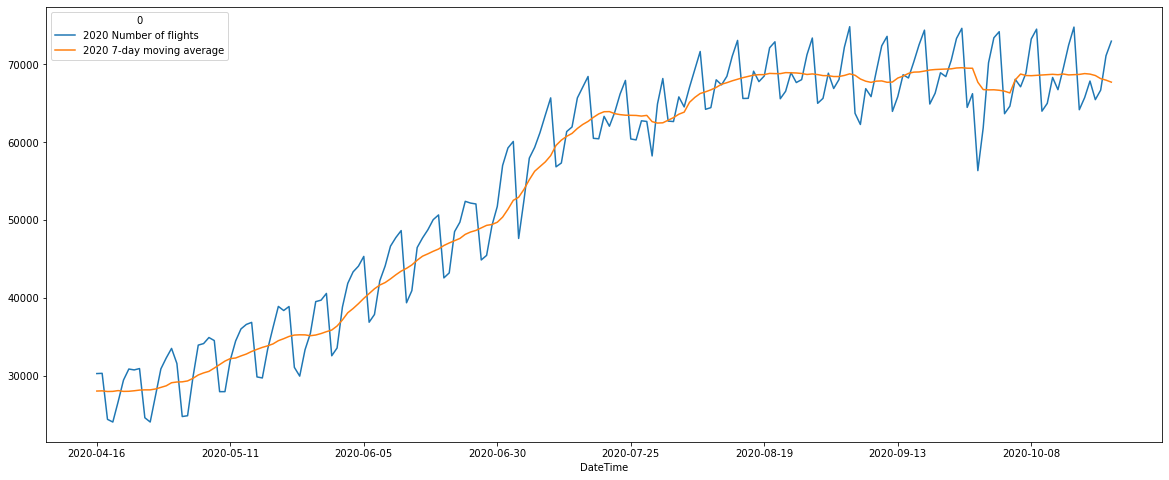

In [782]:
comflighttest.plot(figsize=(20,8))

In [792]:
dml=flight2019.iloc[:len(flight2019.index)/2,1:5].dropna()
dml=dml.astype('float64')
model=sm.OLS(dml['2020 Number of flights'],sm.add_constant(dml['2019 Number of flights']))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     2020 Number of flights   R-squared:                       0.131
Model:                                OLS   Adj. R-squared:                  0.128
Method:                     Least Squares   F-statistic:                     45.80
Date:                    Tue, 03 Nov 2020   Prob (F-statistic):           6.76e-11
Time:                            15:19:08   Log-Likelihood:                -3529.6
No. Observations:                     306   AIC:                             7063.
Df Residuals:                         304   BIC:                             7071.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.949e+05    1.9e+04     10.233      0.000    1.57e+05    2.32e+05
2019 Number of flights    -1.1131      0.164     -6.767      0.000      -1.437      -0.789
==============================================================================
Omnibus:                       27.319   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.772
Skew:                          -0.372   Prob(JB):                     0.000620
Kurtosis:                       2.222   Cond. No.                     1.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [931]:
clean_df.iloc[:,1:].pct_change().dropna().to_excel('C:\\Users\\raymond.widjaja\\Desktop\\Academia Trading Strategies\\cleandf_ret.xlsx')

### XGBOOST

In [932]:
from xgboost import XGBClassifier